In [1]:
import quandl
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
import plotly
import plotly.io as pio
import os
from sklearn.preprocessing import scale

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
SOXL = pd.read_csv('soxl_new.csv') #ETF growth cycle
Nasdaq = pd.read_csv('nasdaq_new.csv') #Index
TQQQ = pd.read_csv('tqqq_new.csv') #3X Index
MU = pd.read_csv('mu_new.csv') #high Beta
AMD = pd.read_csv('amd_new.csv') # high beta
NFLX = pd.read_csv('nflx_new.csv') #High growth
AMZN = pd.read_csv('amzn_new.csv') #High growth
V = pd.read_csv('visa_new.csv') #low volalitity
YINN = pd.read_csv('yinn_new.csv') #looks like bell curve
NVDA = pd.read_csv('nvda_new.csv') #high growth
WTW = pd.read_csv('wtw_new.csv') #high beta
F = pd.read_csv('f_new.csv') #highly traded
MSFT = pd.read_csv('mfst_new.csv') #high traded
HNGR = pd.read_csv('hngr_new.csv') #high beta cyclic




stocks = [SOXL, Nasdaq, TQQQ, MU, AMD, NFLX, AMZN, V, YINN, NVDA, WTW, F, MSFT, HNGR]

In [3]:
for df in stocks:
    end = df.shape[0]
    opn_close = []
    opn_high = []
    opn_open = []
    close_open = []
    close_high = []
    close_close = []
    for i in range((end)):
        if i >= (end - 1):
            opn_close.append(np.nan)
            opn_high.append(np.nan)
            opn_open.append(np.nan)
            close_open.append(np.nan)
            close_high.append(np.nan)
            close_close.append(np.nan)
        else: 
            opn_close.append(1 + (df['Close'][i]-df['Open'][i])/df['Open'][i])     
            opn_high.append(1 + (df['High'][i]-df['Open'][i])/df['Open'][i])
            opn_open.append(1 + (df['Open'][i+1]-df['Open'][i])/df['Open'][i])
            close_open.append(1 + (df['Open'][i+1]-df['Close'][i])/df['Close'][i])
            
            if df['High'][i+1] == df['Open'][i+1]:
                ch = 1 + (df['Close'][i+1]-df['Close'][i])/df['Close'][i]
            else:
                ch = 1 + (df['High'][i+1]-df['Close'][i])/df['Close'][i]
            close_high.append(ch)
            close_close.append(1 + (df['Close'][i+1]-df['Close'][i])/df['Close'][i])
    df['opn_close'] = opn_close
    df['opn_high'] = opn_high
    df['opn_open'] = opn_open
    df['close_open'] = close_open
    df['close_high'] = close_high
    df['close_close'] = close_close
        

In [4]:
for df in stocks:
    end = df.shape[0]
    opn_close = []
  
   
    for i in range((end)):
        if df['opn_high'][i] == 1.0:
            opn_close.append(df['opn_close'][i])
        else:
            opn_close.append(df['opn_high'][i])
    df['opn_high_roi'] = opn_close

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



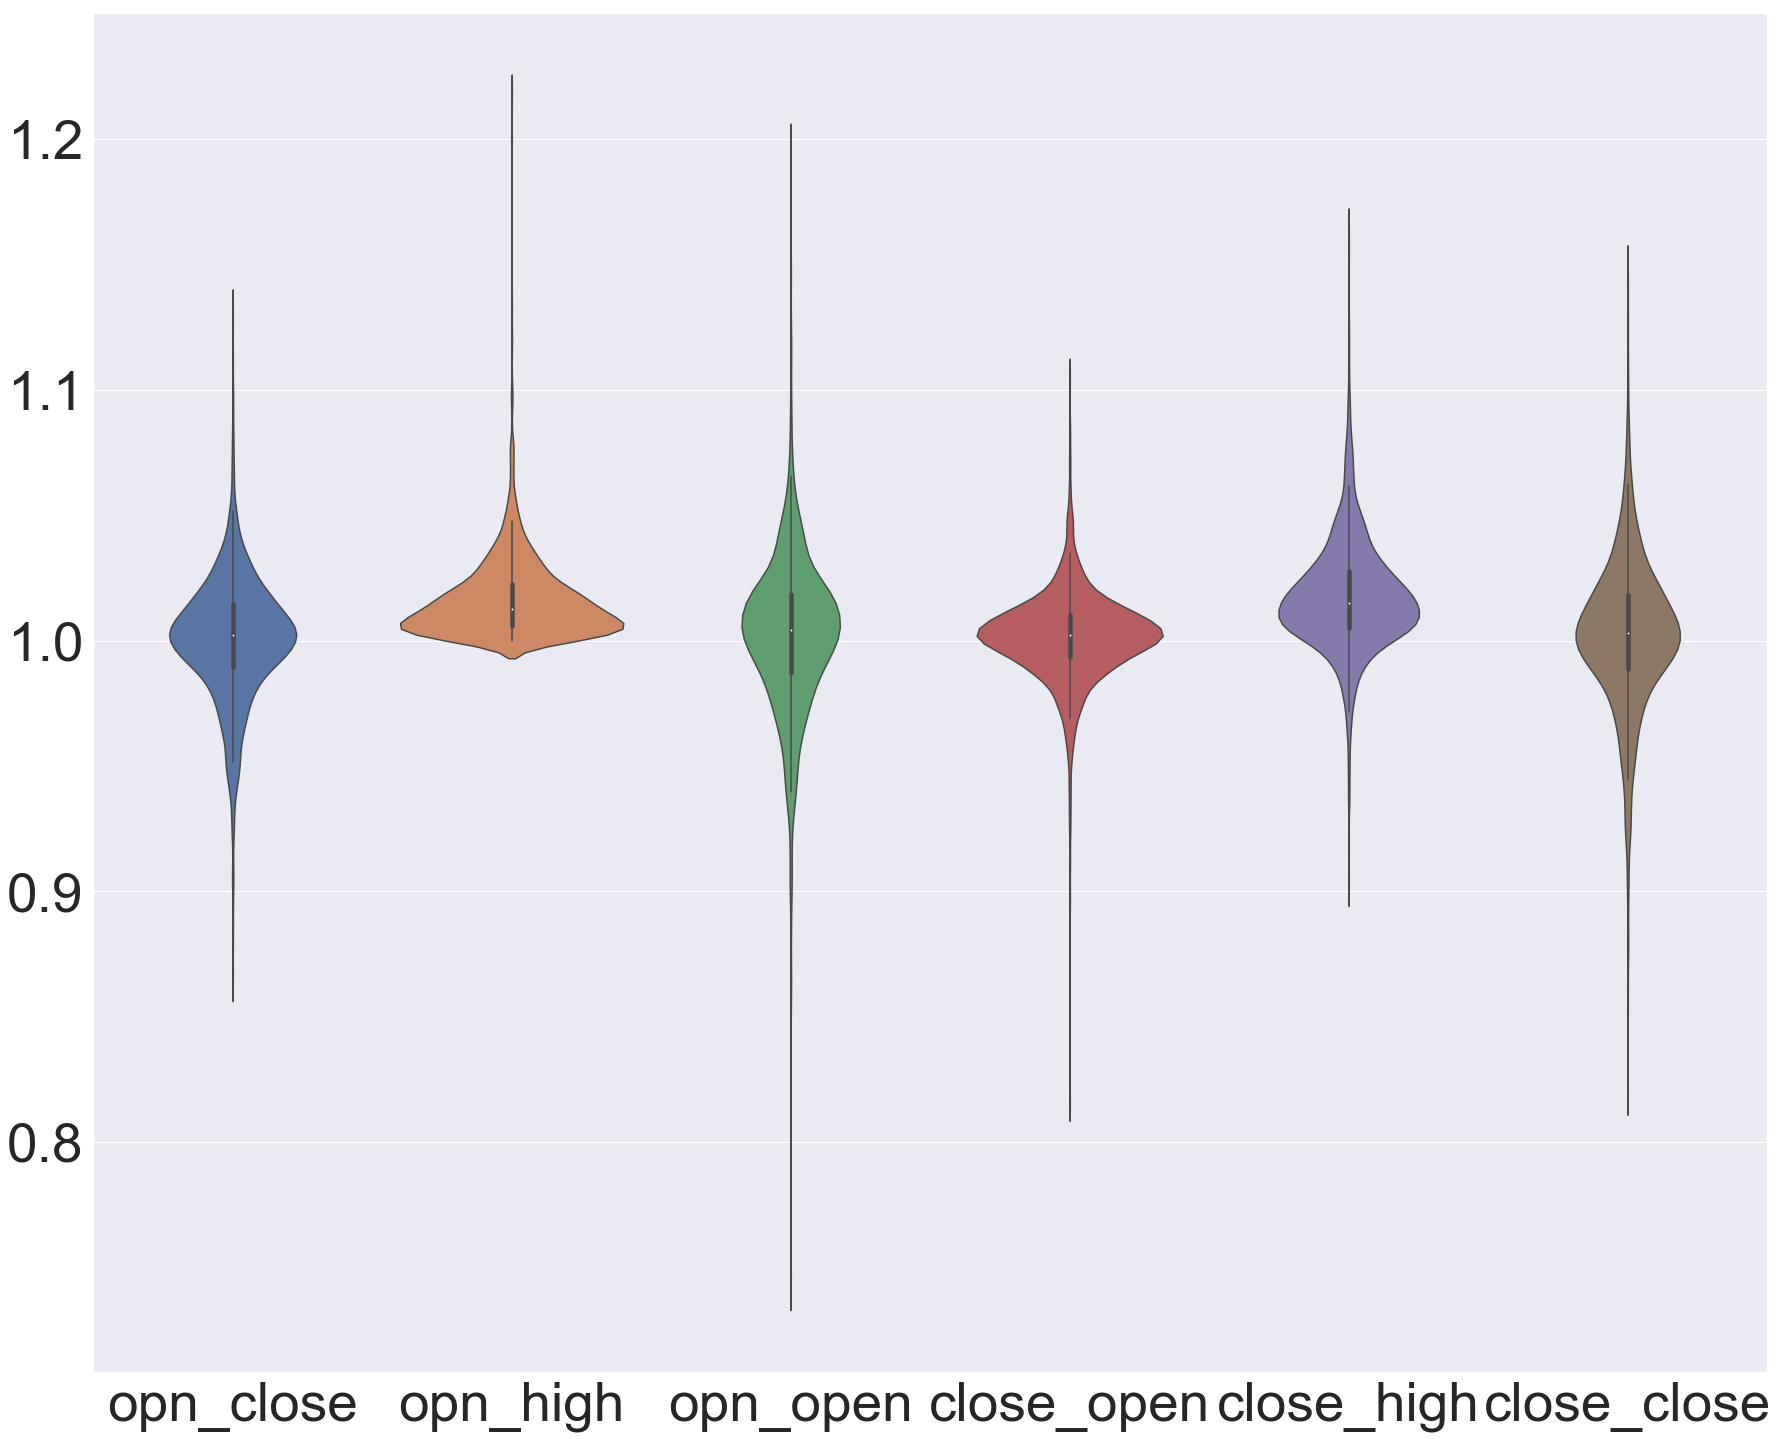

In [5]:
columns = ['opn_close','opn_high','opn_open','close_open','close_high','close_close']
df = TQQQ[columns]

import seaborn as sns
sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [6]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,1.000549,1.016479,1.002121,1.001553,1.017595,1.002095
std,0.024854,0.015867,0.031348,0.018214,0.022608,0.030601
min,0.867138,1.000000,0.746766,0.816471,0.904110,0.824319
25%,0.989388,1.005701,0.987074,0.993709,1.005163,0.988635
50%,1.002107,1.012540,1.004367,1.002227,1.015148,1.002991
75%,1.014595,1.022605,1.018778,1.010217,1.027783,1.018414
max,1.129294,1.218921,1.192538,1.104529,1.162596,1.144322


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



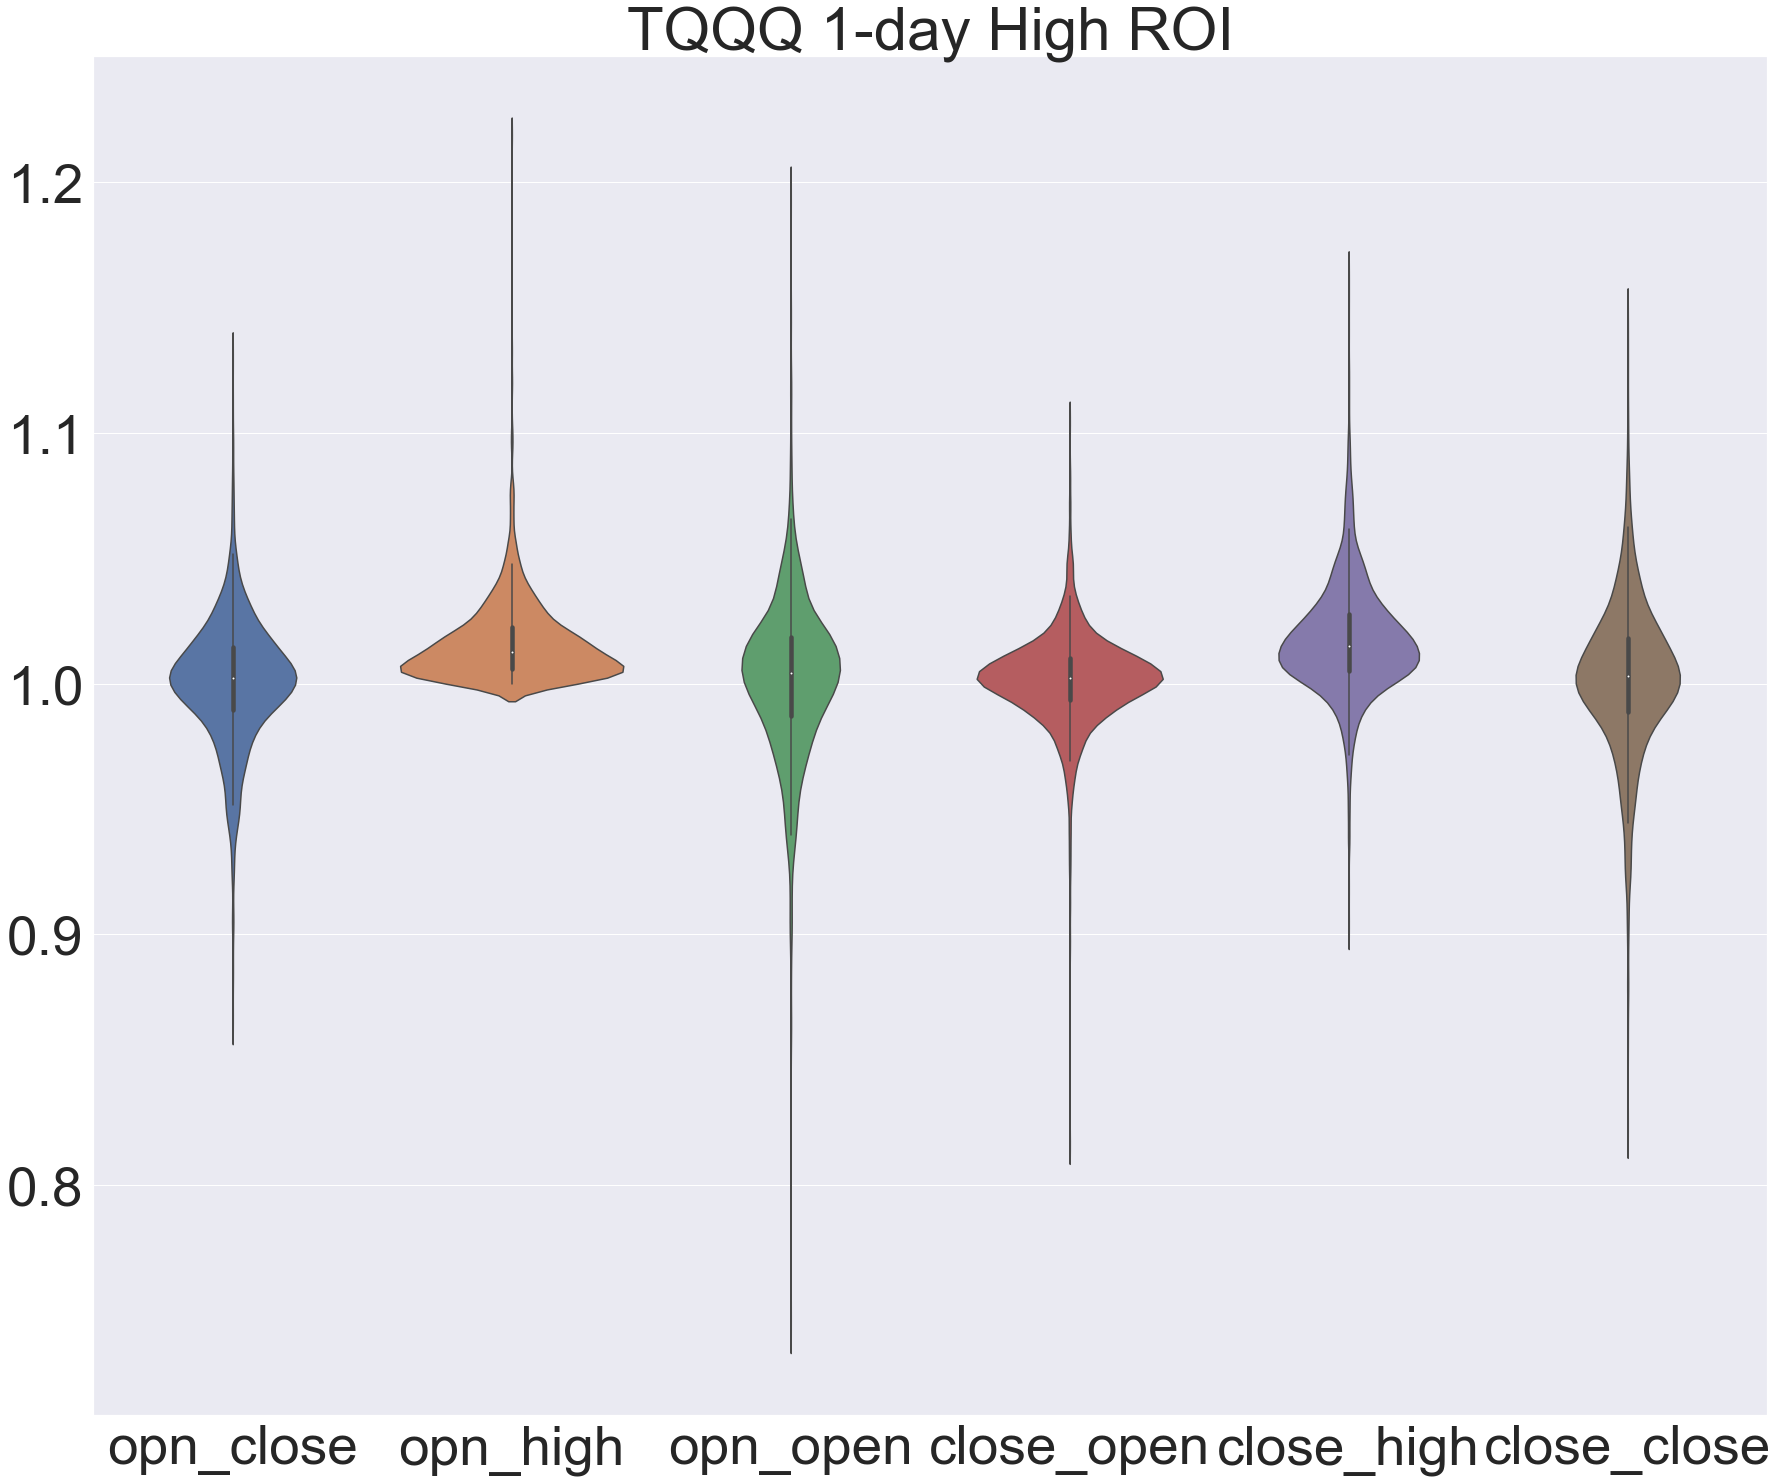

In [30]:
df = TQQQ[columns]

import seaborn as sns

sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
plt.title('TQQQ 1-day High ROI')
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [8]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,0.999885,1.022643,1.002206,1.002292,1.021799,1.002196
std,0.035626,0.022631,0.042953,0.022684,0.035747,0.042424
min,0.855161,1.000000,0.772177,0.799582,0.792759,0.792759
25%,0.979858,1.006238,0.978890,0.990914,1.004619,0.978574
50%,1.001352,1.017409,1.003147,1.003118,1.021261,1.004168
75%,1.021195,1.032339,1.027816,1.014764,1.040283,1.026717
max,1.172791,1.312010,1.279373,1.115589,1.191188,1.170982


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



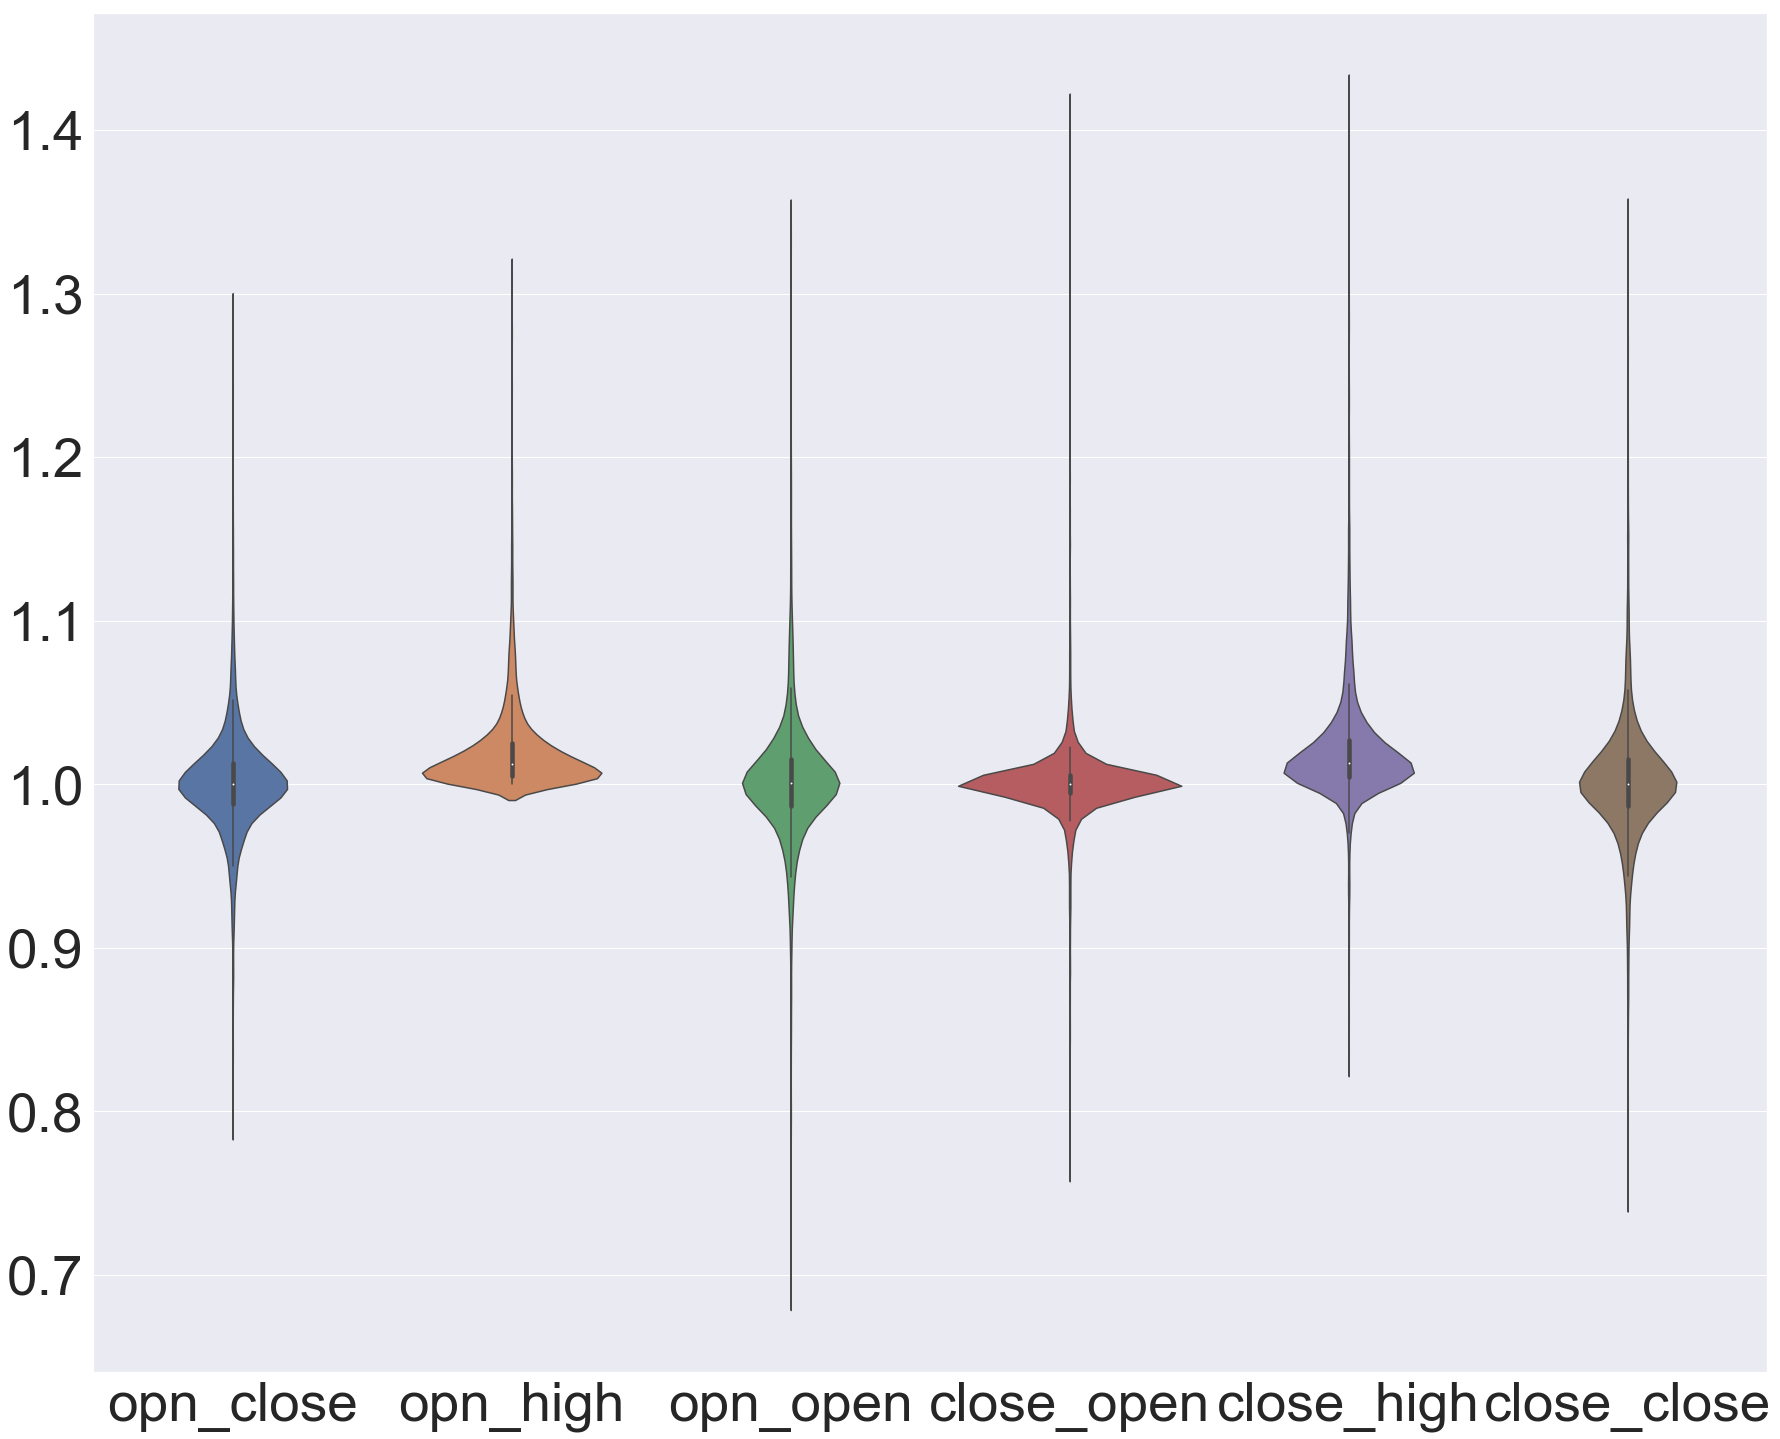

In [9]:
df = AMZN[columns]

import seaborn as sns
sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [10]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000
mean,1.001176,1.020515,1.001853,1.000660,1.020581,1.001799
std,0.031547,0.026465,0.038589,0.021660,0.034039,0.037412
min,0.794309,1.000000,0.692521,0.765111,0.833846,0.752339
25%,0.987851,1.005179,0.986723,0.994732,1.004444,0.986614
50%,1.000205,1.012643,1.000797,1.000490,1.013337,1.000409
75%,1.013377,1.025084,1.015583,1.006002,1.027381,1.015243
max,1.288991,1.311927,1.343665,1.414576,1.421744,1.344714


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



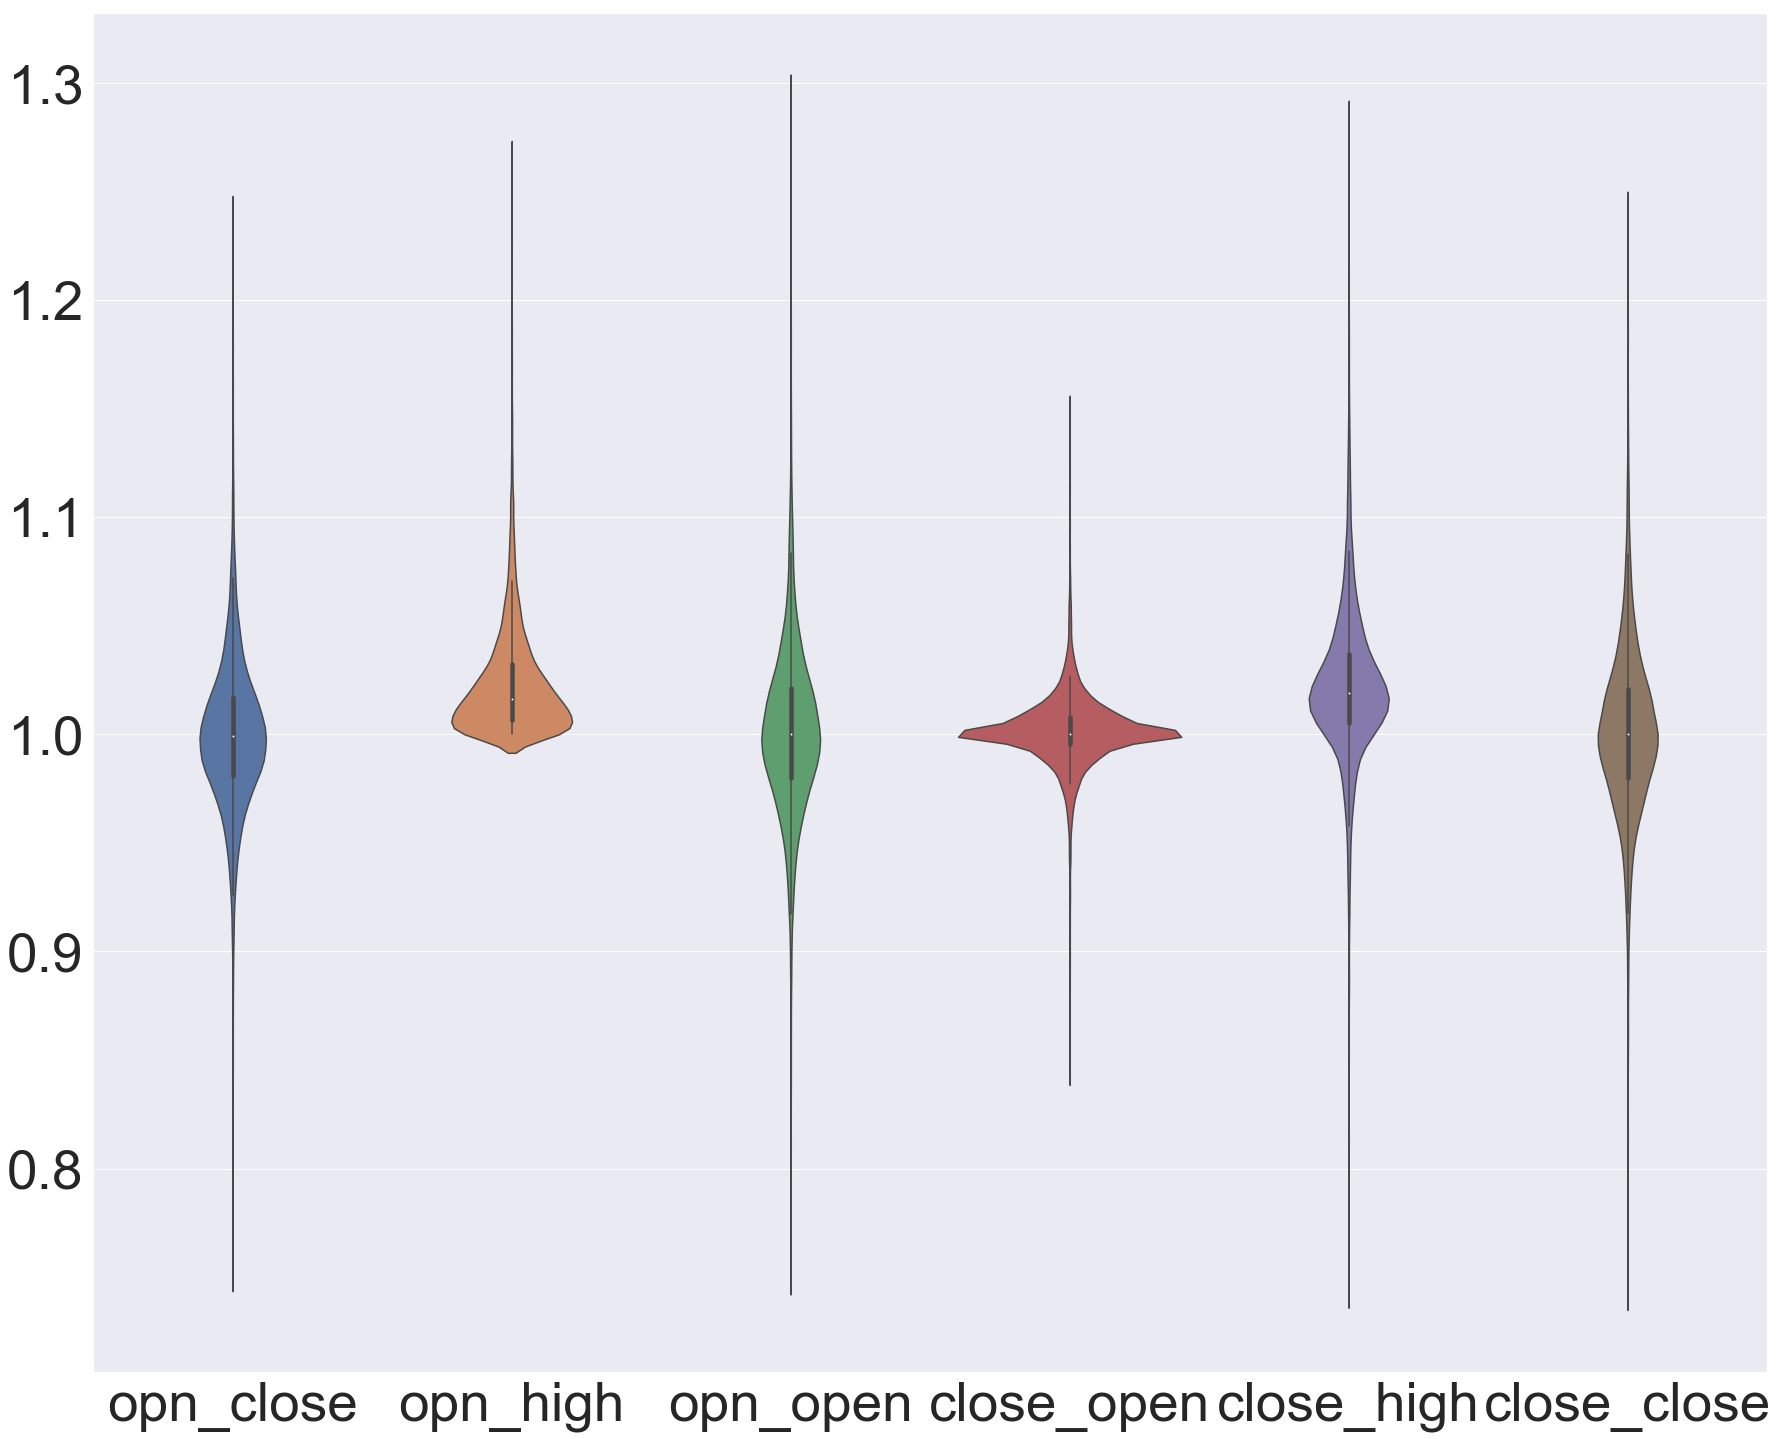

In [11]:
df = MU[columns]

import seaborn as sns
sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [12]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,8426.000000,8426.000000,8426.000000,8426.000000,8426.000000,8426.000000
mean,0.999634,1.023855,1.001201,1.001540,1.022053,1.001198
std,0.034918,0.025769,0.039370,0.016380,0.035791,0.038937
min,0.754902,1.000000,0.754902,0.843880,0.747573,0.747573
25%,0.980645,1.006667,0.979789,0.995761,1.005208,0.979767
50%,0.999448,1.016500,1.000000,1.000000,1.018886,1.000000
75%,1.017181,1.032258,1.021365,1.008264,1.036948,1.021053
max,1.236697,1.265032,1.291139,1.150721,1.280224,1.237288


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



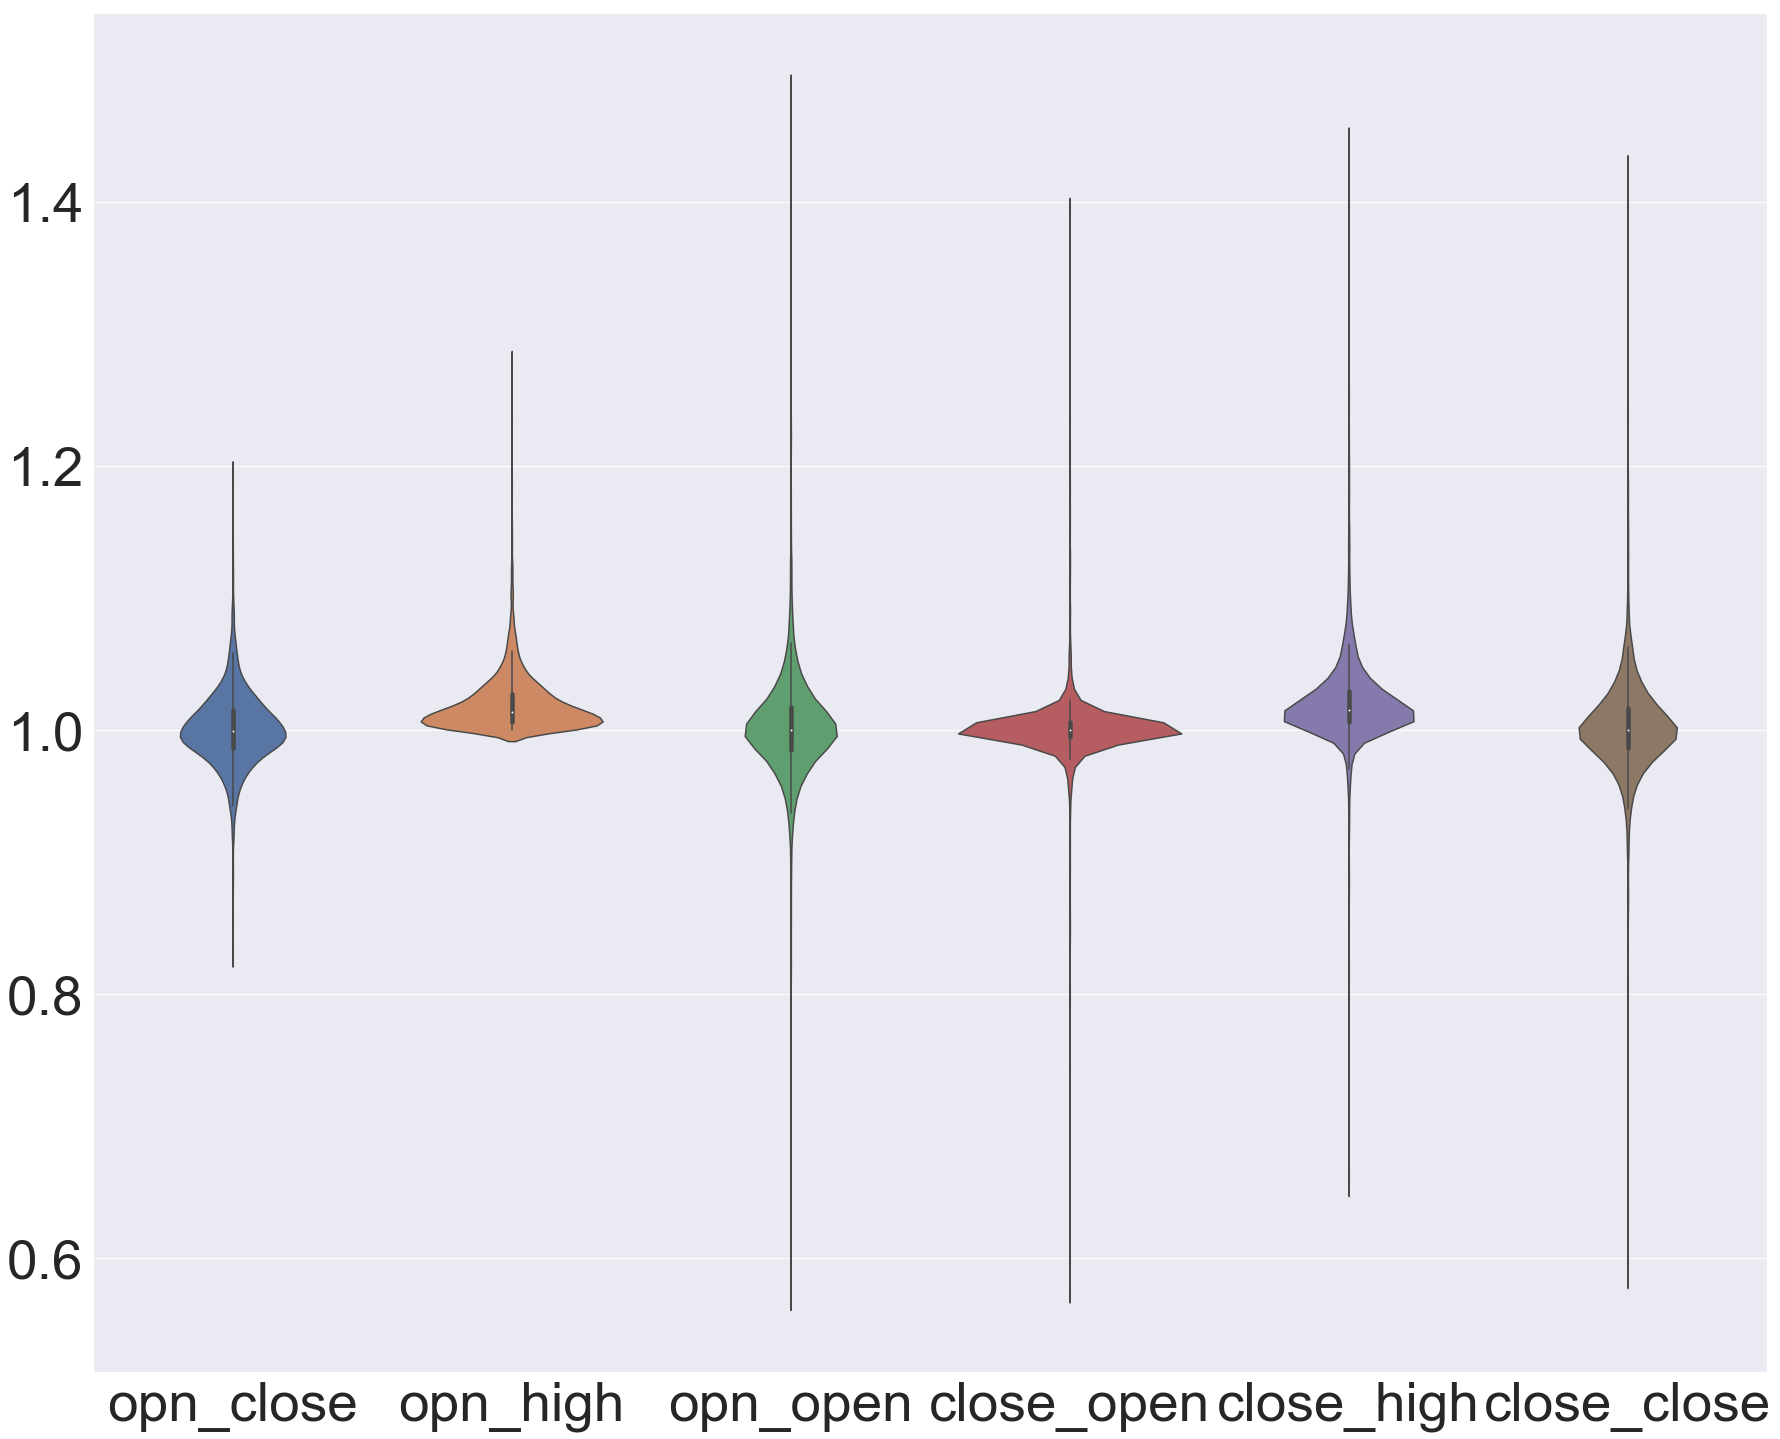

In [13]:
df = NFLX[columns]

import seaborn as sns
sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [14]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000
mean,1.001121,1.020356,1.002174,1.001018,1.020609,1.002113
std,0.027845,0.021517,0.037539,0.023477,0.031734,0.035384
min,0.831580,1.000000,0.575115,0.575445,0.659208,0.590935
25%,0.986248,1.006216,0.985258,0.995111,1.005968,0.986271
50%,0.999459,1.014220,1.000375,1.000460,1.015228,1.000372
75%,1.015315,1.027842,1.017503,1.006234,1.029887,1.017163
max,1.193194,1.279175,1.482446,1.394441,1.444606,1.422235


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



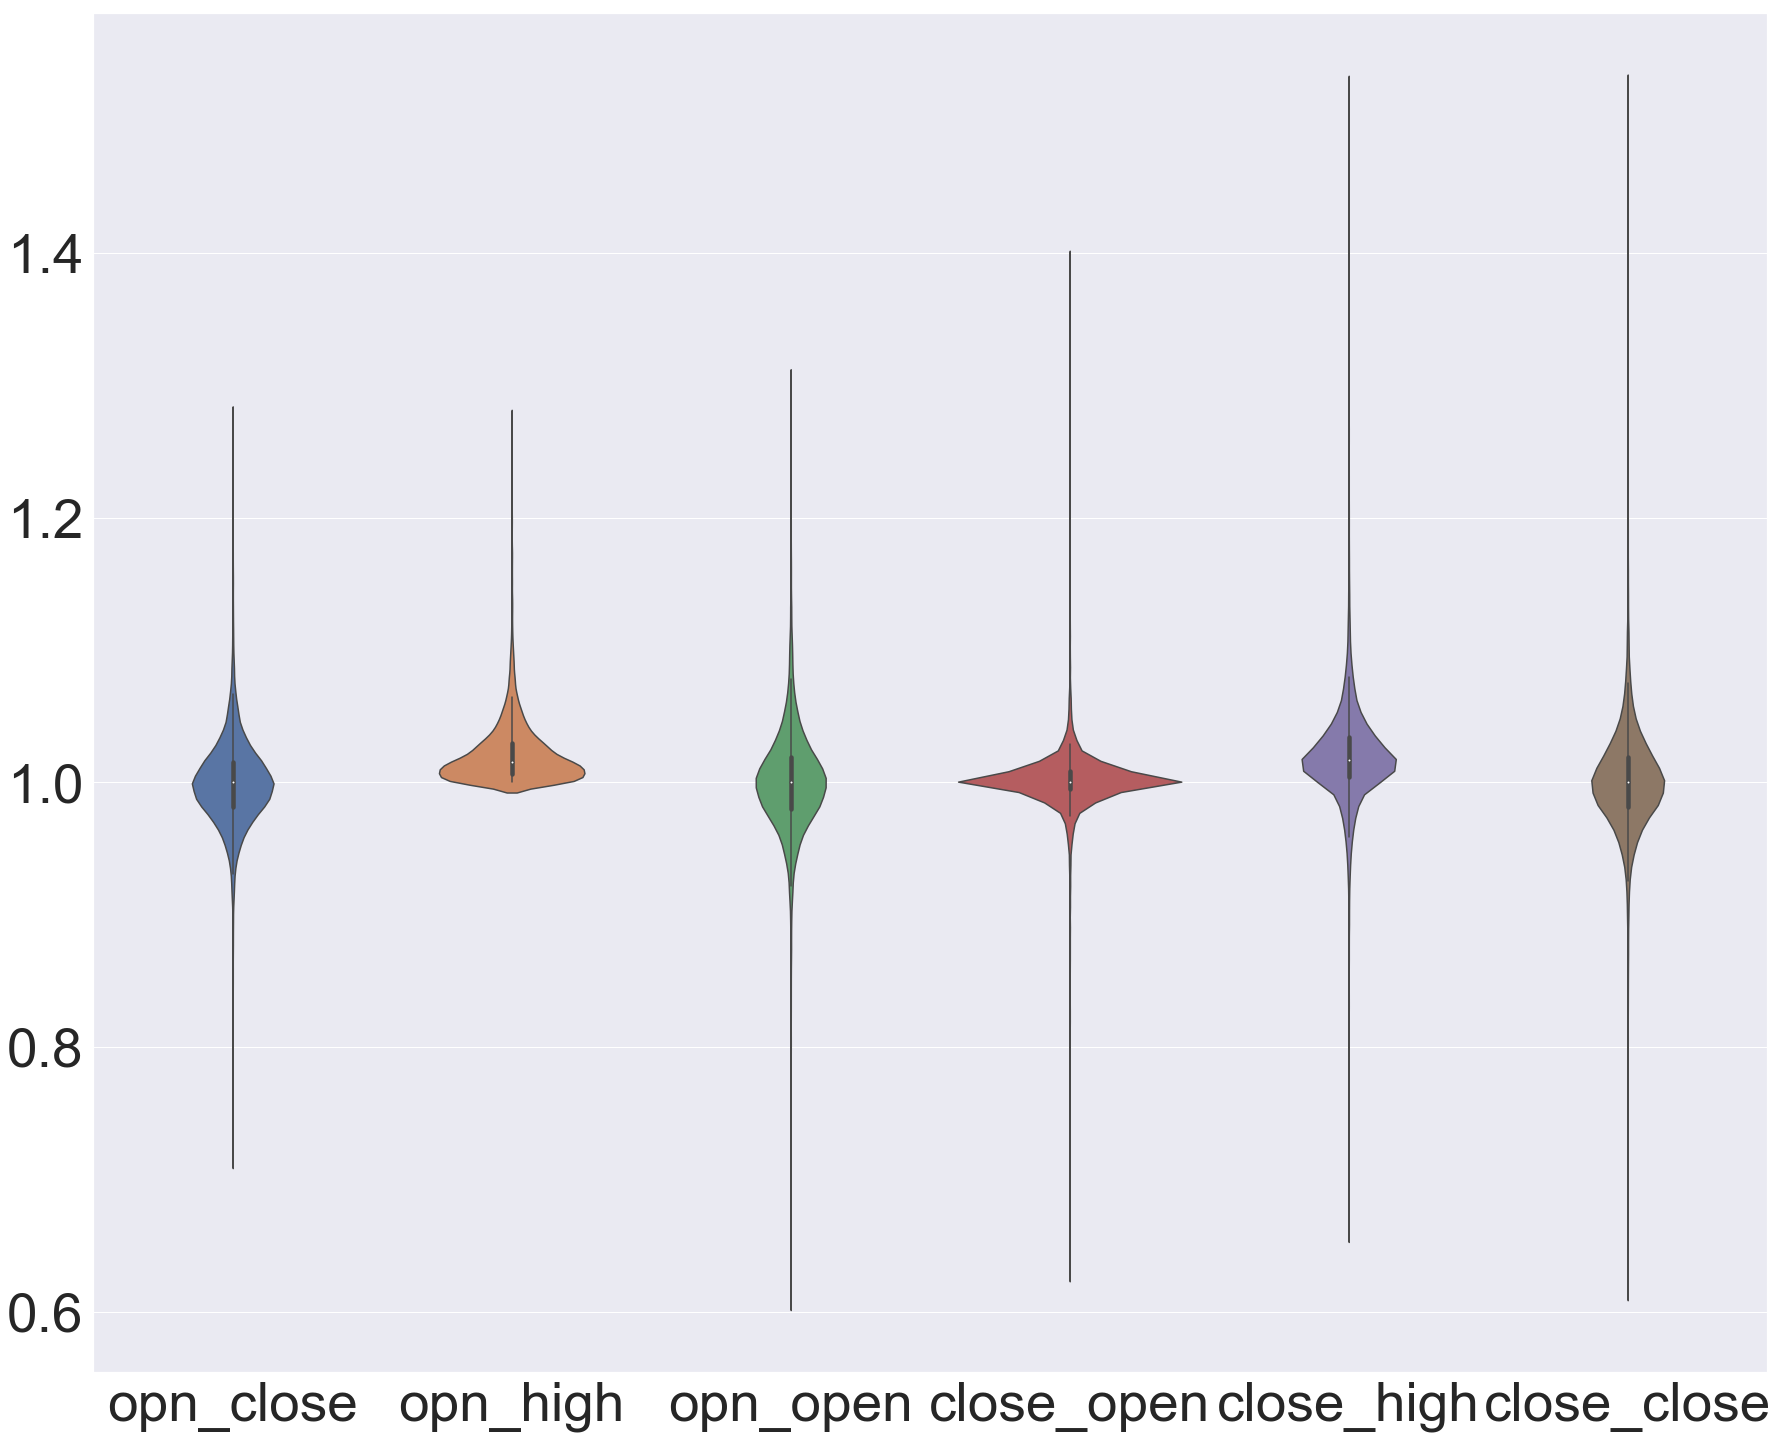

In [15]:
df = AMD[columns]

import seaborn as sns
sns.set(font_scale=5)  # 
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df)
    

In [16]:
df.describe()

,opn_close,opn_high,opn_open,close_open,close_high,close_close
count,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000
mean,0.999604,1.021952,1.000861,1.001242,1.019831,1.000841
std,0.032127,0.023940,0.038236,0.019924,0.034757,0.037646
min,0.718750,1.000000,0.613445,0.629310,0.663793,0.620690
25%,0.981707,1.006547,0.980198,0.994774,1.004008,0.981481
50%,1.000000,1.015066,1.000000,1.000000,1.016878,1.000000
75%,1.015688,1.029810,1.019231,1.008496,1.034204,1.019135
max,1.273885,1.273885,1.300000,1.395415,1.522901,1.522901


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



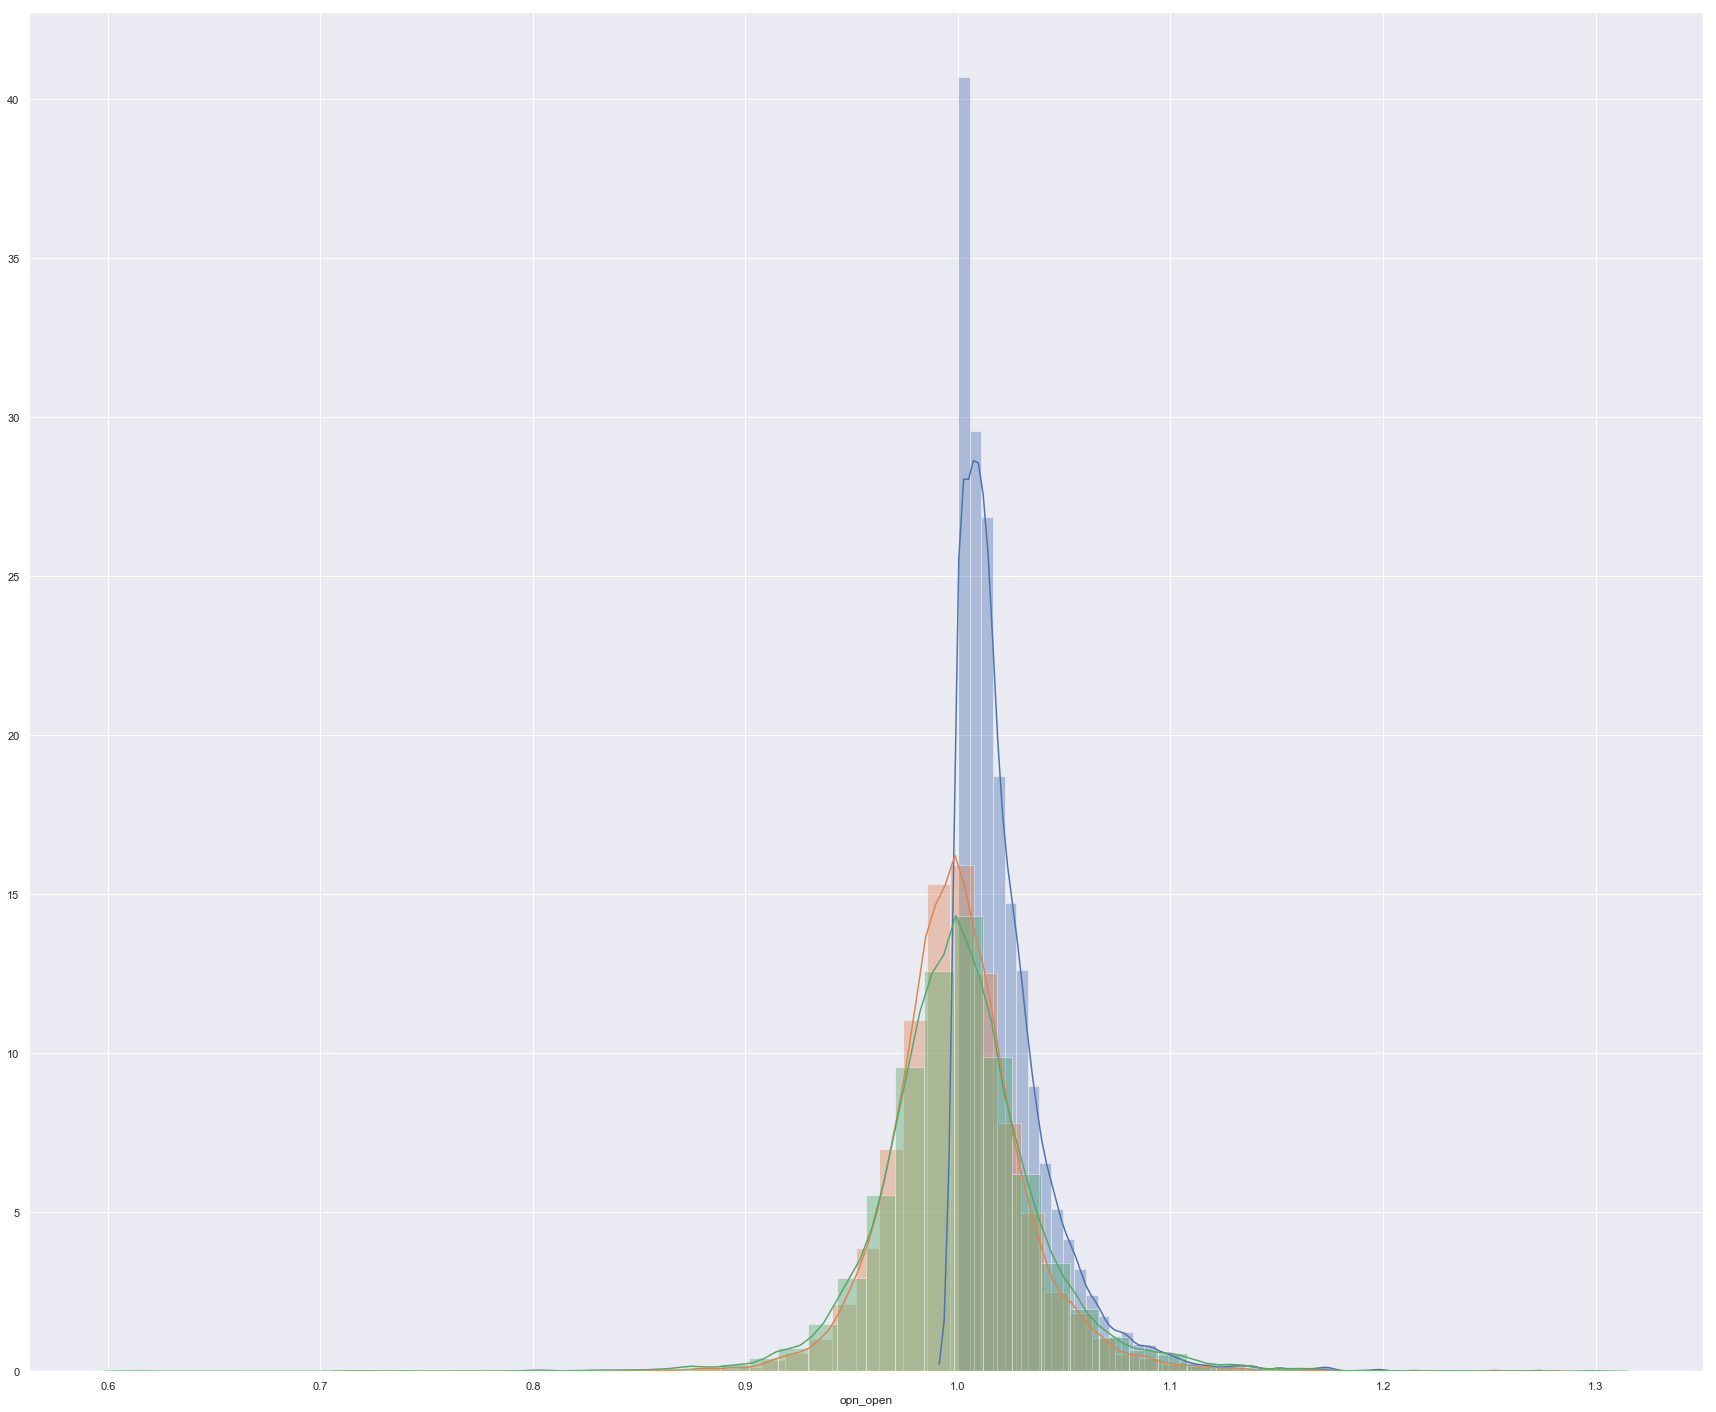

In [17]:
df.dropna(inplace=True)
# sns.kdeplot(x, shade=True)
sns.set(font_scale=5)  # 
sns.set(color_codes=True)
plt.subplots(figsize=(30,25))
sns.distplot(df['opn_high'])
sns.distplot(df['opn_close'])
sns.distplot(df['opn_open'])




In [18]:

stocks = [SOXL, Nasdaq, TQQQ, MU, AMD, NFLX, AMZN, V, YINN, NVDA, WTW, F, MSFT, HNGR]

In [68]:
from random import seed
from random import random

prob = .52
df = TQQQ.dropna()
Q3 = df['opn_high'].quantile(.75)
Q2 = df['opn_high'].quantile(.5)
Q1 = df['opn_high'].quantile(.25)
avg_op_close = []
avg_op_high = []
for n in range(100):
    end = df.shape[0]
    op_close = []
    op_high = []
    count=0
    counterq2=0
    counterq3=0
    for i in range(end):
        rand = random()
        #print(rand)
        op_close.append(df['opn_close'][i])
        
        if df['opn_close'][i] > 1: #buy
           
            
            if rand < prob:
                op_high.append(df['opn_close'][i])
            
            
        else:
            if rand < (1-prob):
                op_high.append(df['opn_close'][i])
    #print((counterq2/count),(counterq3/count))
    
    opclose = np.prod(np.array(op_close))
   
    ophigh = np.prod(np.array(op_high))
    avg_op_close.append(opclose)
    avg_op_high.append(ophigh)
   

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



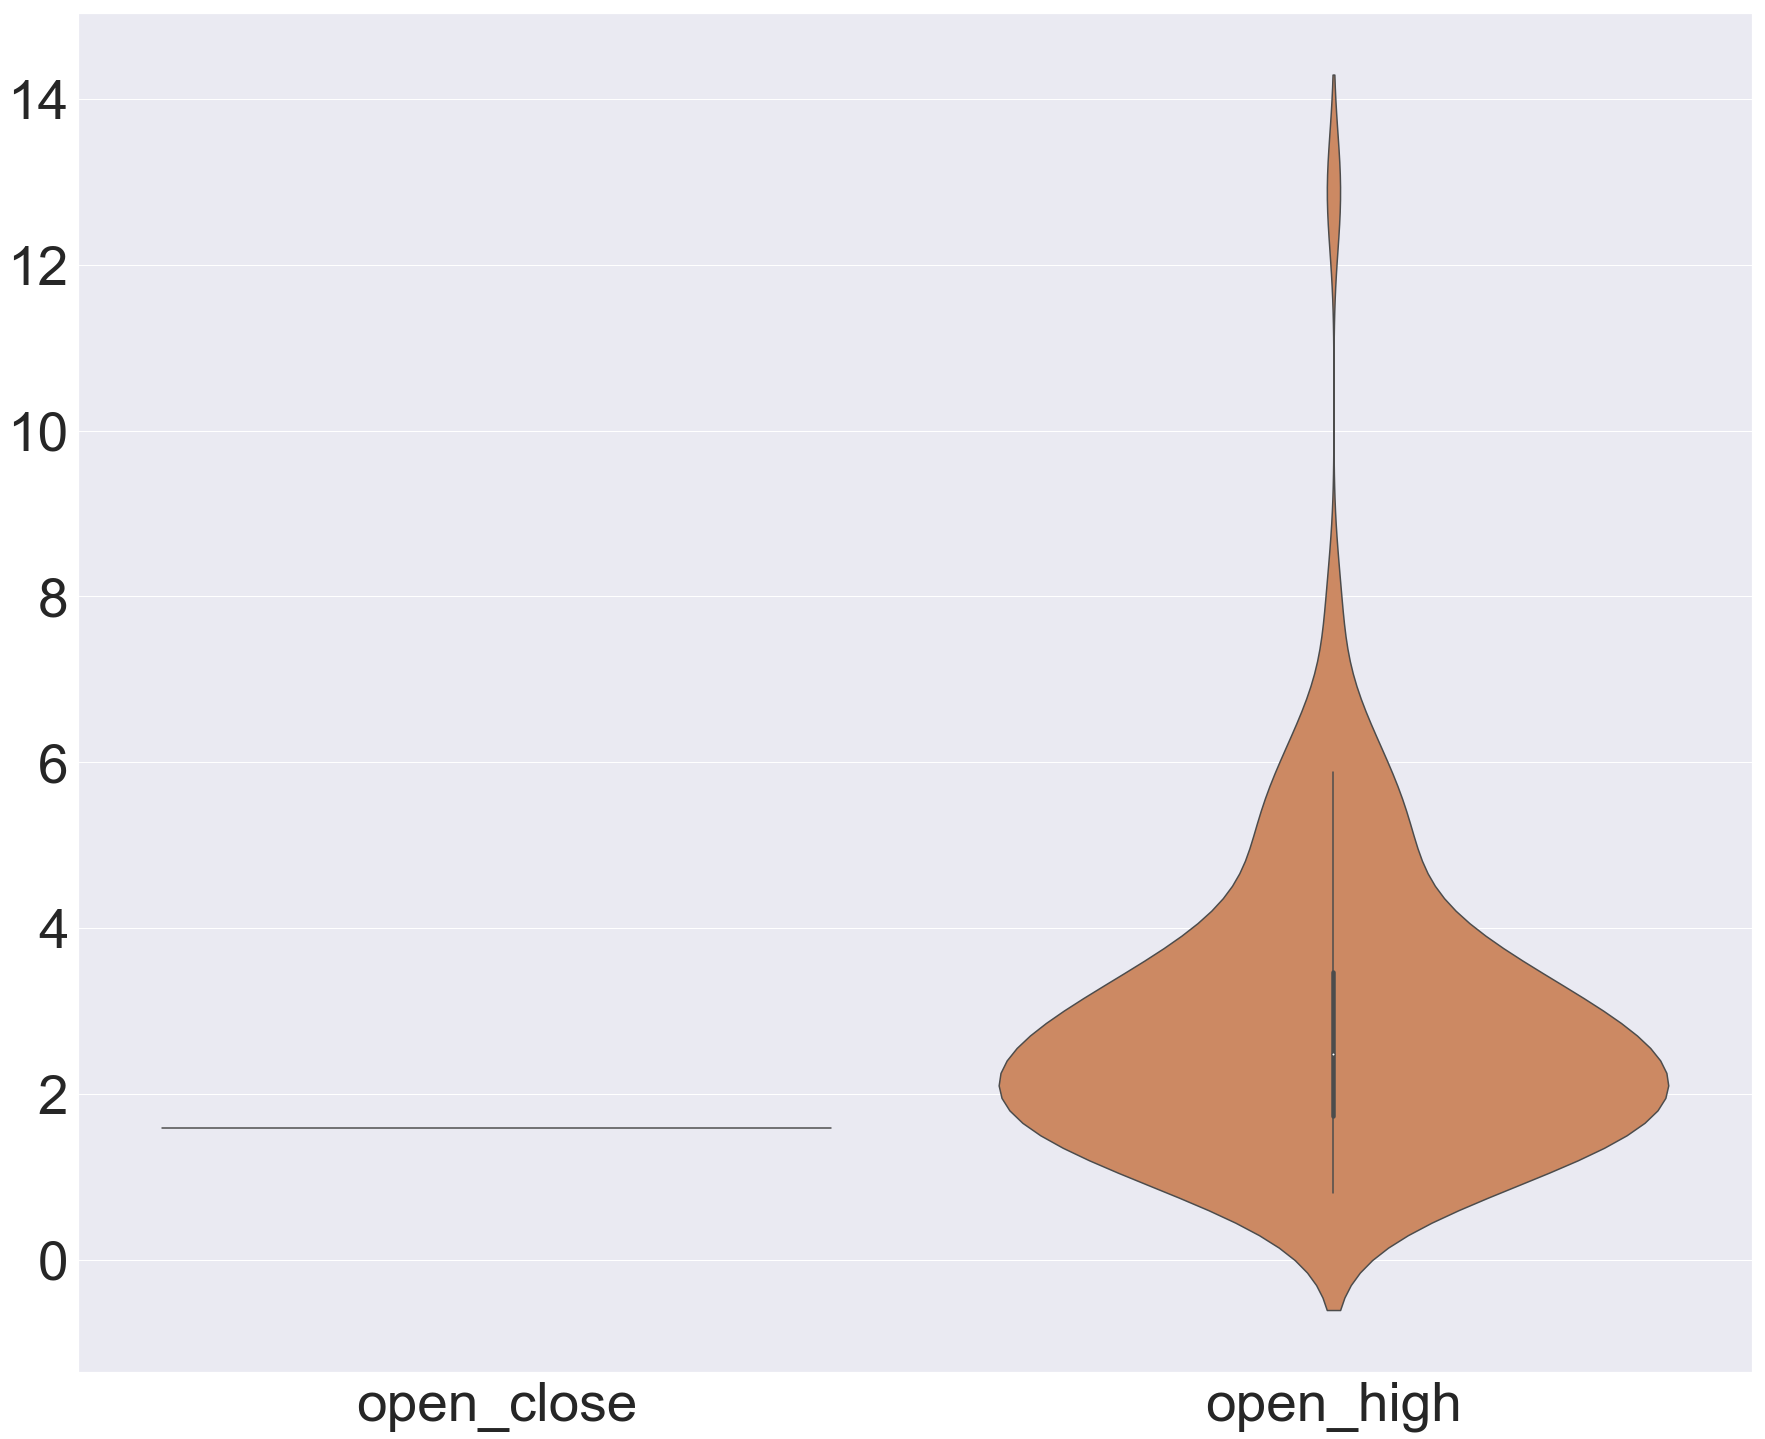

In [69]:
df_1 = pd.DataFrame(avg_op_close,columns=['open_close'])
df_2 = pd.DataFrame(avg_op_high,columns=['open_high'])
df_new =df_1.merge(df_2,left_index=True, right_index=True)
sns.set(font_scale=5)   
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")

ax = sns.violinplot(data=df_new)
    

In [70]:
df_new.describe()

,open_close,open_high
count,1.000000e+02,100.000000
mean,1.589084e+00,2.874279
std,3.347448e-15,1.772362
min,1.589084e+00,0.803424
25%,1.589084e+00,1.731272
50%,1.589084e+00,2.483493
75%,1.589084e+00,3.467548
max,1.589084e+00,12.884849


In [71]:
TQQQ['easy_buy'].value_counts()

buy     1122
sell     824
Name: easy_buy, dtype: int64

In [72]:
1122/(1122+824)

0.5765673175745119

In [22]:
mean(df_new['open_high']) - 2*stdev(df_new['open_high'])

1.360886349189391

In [23]:
prob_threshold = {'SOXL': .36,'TQQQ':.26,
                 'MU':.2,'AMD':13,'NFLX':26,'AMZN':27,
                 'V':11,'YINN':29,'NVDA':.24,'WTW':.2}


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



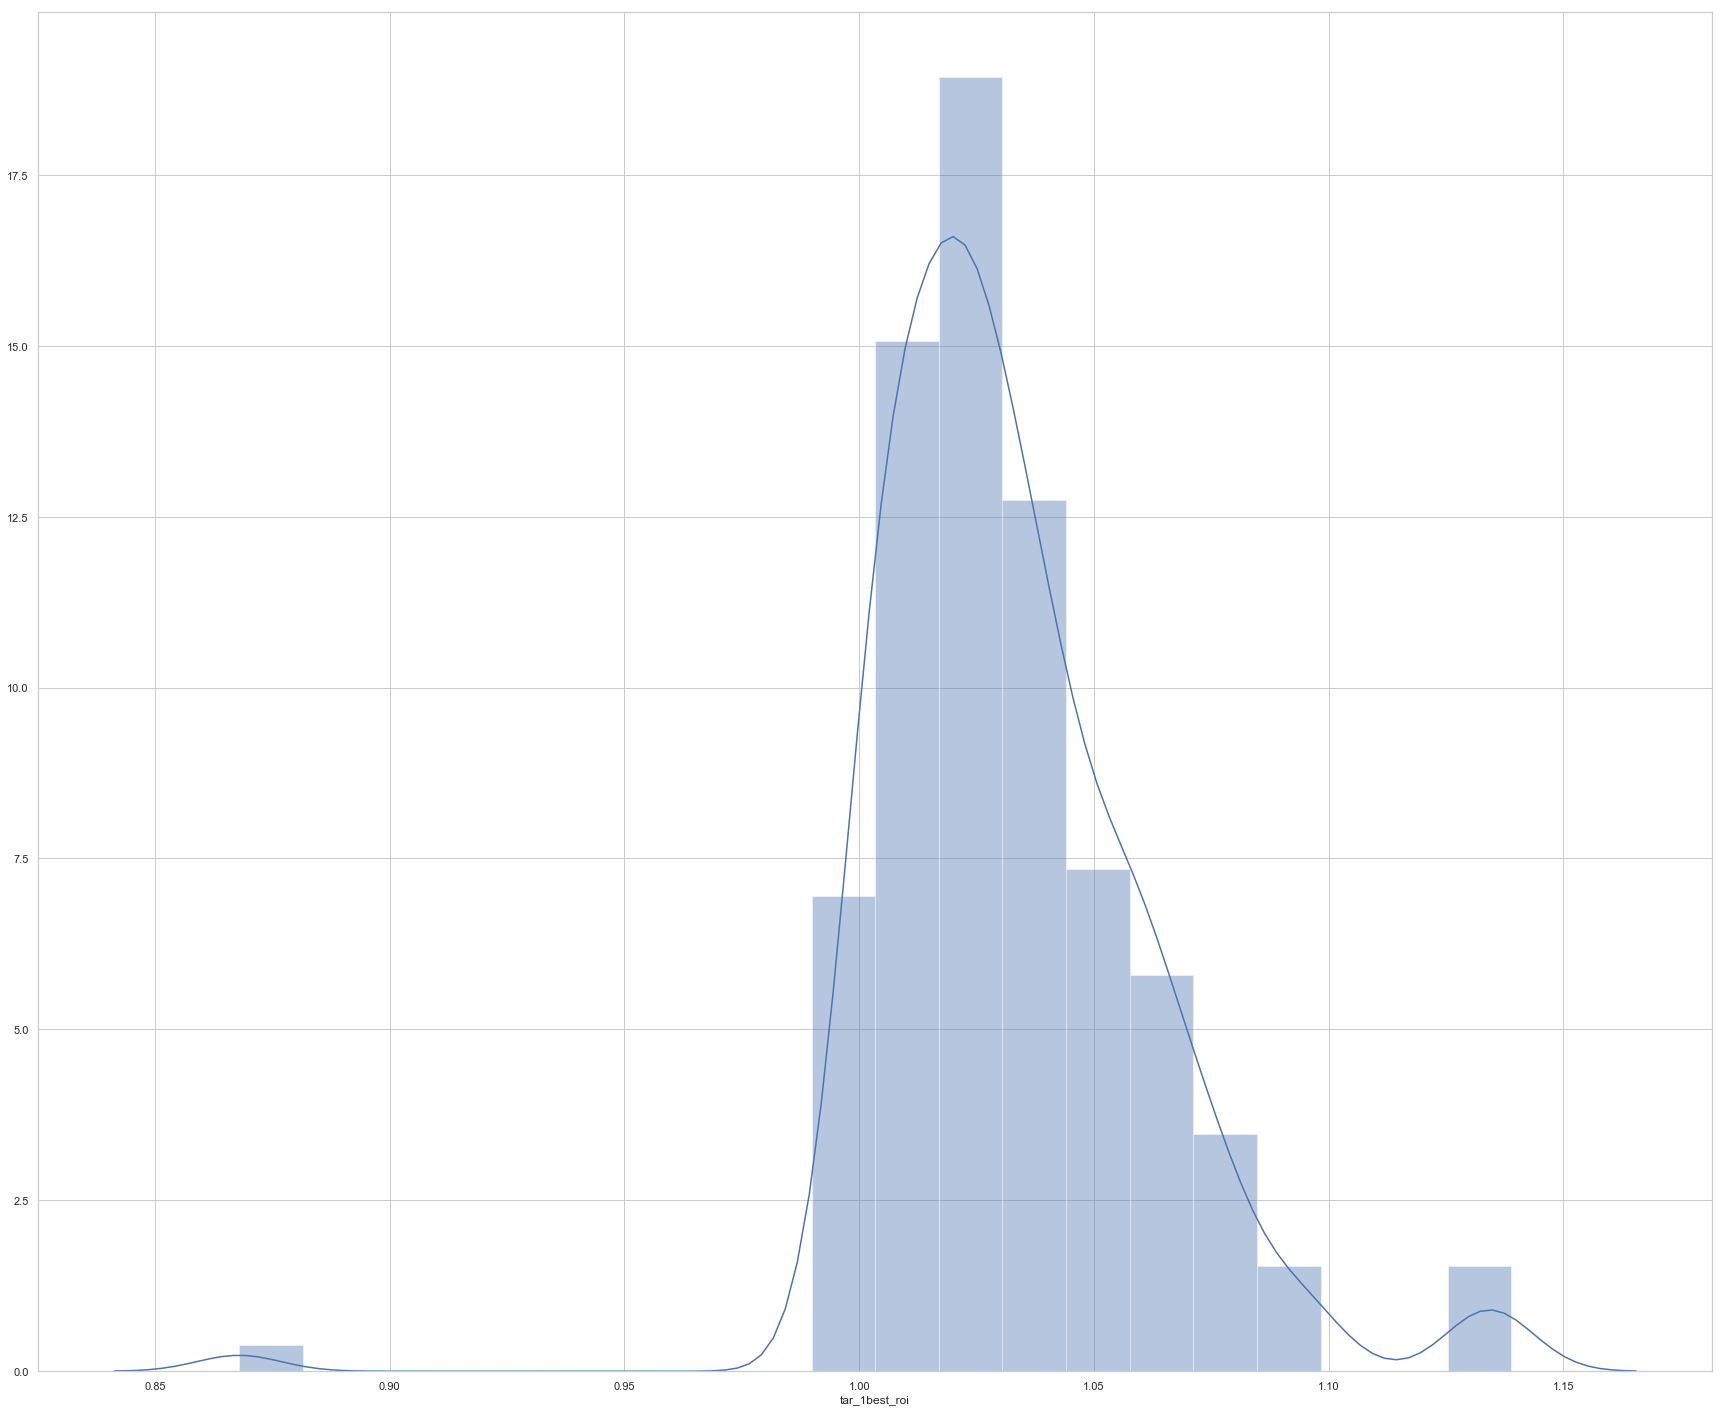

In [125]:
test_df = TQQQ[TQQQ['close_open'] > 1.02 ]
plt.subplots(figsize=(30,25))
sns.distplot(test_df['tar_1best_roi'],bins=20)

In [126]:
mean(test_df['tar_5best_roi'])

1.0641130629051014

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



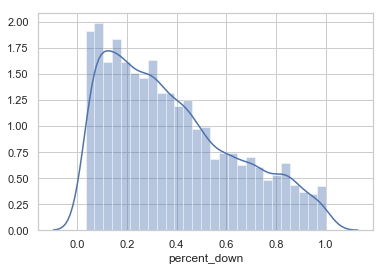

In [102]:
sns.distplot(AMD['percent_down'])